## 0. Импортируем библиотеки и считаем изображение

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread(r"lena15.jpg", 0)

In [3]:
img.shape

(512, 512)

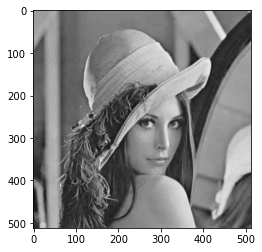

In [4]:
plt.imshow(img, cmap = "gray")

## 1. Найдем лицо


In [5]:
face_cascade = cv2.CascadeClassifier('C:/Users/User/AppData/Local/Programs/Python/Python38-32/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')


In [6]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [7]:
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)

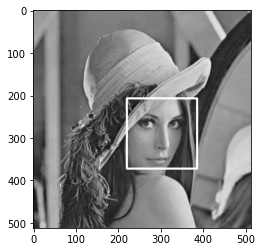

In [8]:
plt.imshow(img, cmap = "gray")

In [9]:
face = img[y:y+h, x:x+w]

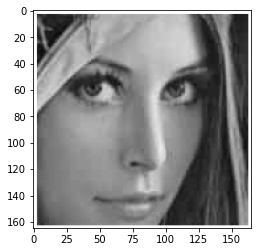

In [10]:
plt.imshow(face, cmap = "gray")

In [11]:
x_face, y_face = face.shape

## 2. Отступаем от границ

In [12]:
crop_face = face[int(0.05*y_face):int(0.95*y_face), int(0.05*x_face):int(0.95*x_face)]

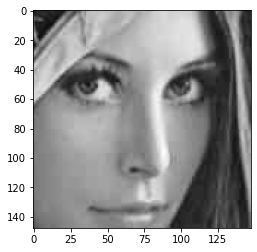

In [13]:
plt.imshow(crop_face, cmap = "gray")

## 3. Находим границы 

In [14]:
edges = cv2.Canny(crop_face, 50, 100)

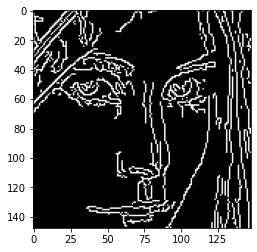

In [15]:
plt.imshow(edges, cmap = "gray")

In [16]:
print(edges.shape)

(148, 148)


## 4. Удалим мелкие границы

In [17]:
image, contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
big_egdes = []
minAreaRect = 0
minRect = 0

for i in contours:
    minAreaRect = cv2.minAreaRect(i)  
    minRect = minAreaRect[1][1]*minAreaRect[1][0]
    if minRect >= 10:
        big_egdes.append(i)
cont = np.zeros(edges.shape, dtype='uint8')
cv2.drawContours(cont, big_egdes, -1, (255, 255, 255), 1)  

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0]], dtype=uint8)

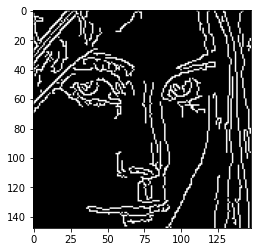

In [19]:
plt.imshow(cont, cmap = "gray")

In [20]:
cont2 = np.zeros(edges.shape, dtype='uint8')
cv2.drawContours(cont2, big_egdes, -1, (255, 255, 255), 5)  

array([[255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

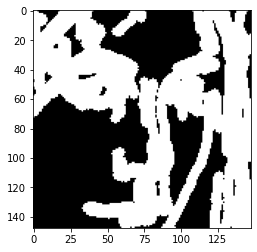

In [21]:
plt.imshow(cont2, cmap = "gray")

## 5. Наращивание

In [22]:
krn = np.ones((5, 5), np.uint8)
cont3 = cv2.dilate(cont, krn)

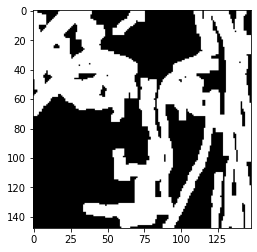

In [23]:
plt.imshow(cont3, cmap = "gray")

## 6. Гаусс и нормировка

In [24]:
cont_gauss = cv2.GaussianBlur(cont3, (5, 5), 1)

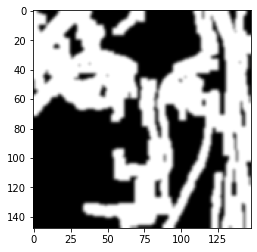

In [25]:
plt.imshow(cont_gauss, cmap = "gray")

In [26]:
cont_norm = cv2.normalize(cont_gauss, None, 0, 1, cv2.NORM_MINMAX)

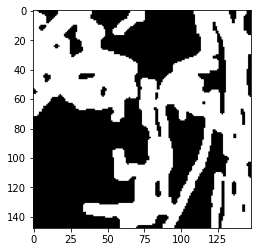

In [27]:
plt.imshow(cont_norm, cmap = "gray")

## 7. Билатеральная фильтрация

In [28]:
img_color = cv2.imread(r"lena15.jpg")
face_color = img_color[y:y+h, x:x+w]
face_color = face_color[int(0.05*y_face):int(0.95*y_face), int(0.05*x_face):int(0.95*x_face)]

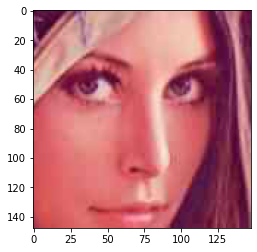

In [29]:
plt.imshow(cv2.cvtColor(face_color, cv2.COLOR_BGR2RGB))

In [30]:
face_bill = cv2.bilateralFilter(face_color, 10, 42, 42)

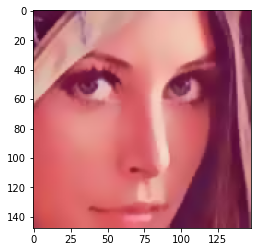

In [31]:
plt.imshow(cv2.cvtColor(face_bill, cv2.COLOR_BGR2RGB))

## 8. Четкость/контрастность

In [32]:
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#face_usm = cv2.filter2D(face_color, -1, kernel)

In [33]:
#plt.imshow(cv2.cvtColor(face_usm, cv2.COLOR_BGR2RGB))

In [34]:
alpha = 1.5 
beta = 0 

In [35]:
adjusted = cv2.convertScaleAbs(face_color, alpha=alpha, beta=beta)

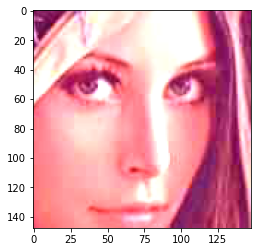

In [36]:
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))

## 9. Финальная фильтрация

In [37]:
M = cv2.merge((cont_norm, cont_norm, cont_norm))
F1 = face_bill
F2 = adjusted
print(M.shape, F1.shape, F2.shape)

(148, 148, 3) (148, 148, 3) (148, 148, 3)


In [38]:
Fin = M*F2 + (1 - M)*F1

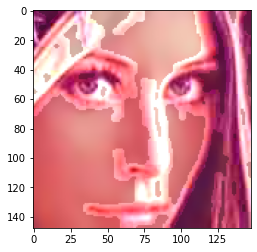

In [39]:
plt.imshow(cv2.cvtColor(Fin, cv2.COLOR_BGR2RGB))